# Project 1 

In [ ]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

## Part 1: 
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. 
* How many features do we have in this dataset? ****
* How many observations have a 'mean area' of greater than 700? ****
* How many participants tested `Malignant`? ****
* How many participants tested `Benign`? ****

In [ ]:
import numpy as np
import pandas as pd
import sklearn 

target_data = dataset.target
feature_data = dataset.data

df = pd.DataFrame(feature_data, columns=dataset['feature_names']) #construct columns for feature_names
df['targets'] = dataset['target'] #create another column for target

print(len(df[df['mean area'] > 700]),'observations have a mean area of greater than 700')
print(len(df[df['targets']==0]),'participants tested Malignant')
print(len(df[df['targets']==1]),'participants tested Benign')

171 observations have a mean area of greater than 700
212 participants tested Malignant
357 participants tested Benign


In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,targets
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,1.306537,0.66560,0.7119,0.2654,0.4601,1.935312,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,-0.375282,0.18660,0.2416,0.1860,0.2750,0.280943,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.526944,0.42450,0.4504,0.2430,0.3613,0.201214,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,3.391291,0.86630,0.6869,0.2575,0.6638,4.930672,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.220362,0.20500,0.4000,0.1625,0.2364,-0.396751,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.378033,0.21130,0.4107,0.2216,0.2060,-0.708467,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,-0.690623,0.19220,0.3215,0.1628,0.2572,-0.973122,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,-0.808876,0.30940,0.3403,0.1418,0.2218,-0.318129,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,1.429169,0.86810,0.9387,0.2650,0.4087,2.217684,0


In [ ]:
# We have 30 features.
# 171 observations have a 'mean area' of greater than 700
# 212 participants tested Malignant
# 357 participants tested Benign

### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_data, df['targets'], test_size=0.3, random_state=0)

### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is ``worst smoothness``, the y-axis is ``worst fractal dimension,`` and the color of each datapoint indicates its class.  

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Based on your observation, what is the advantage of standardization? 




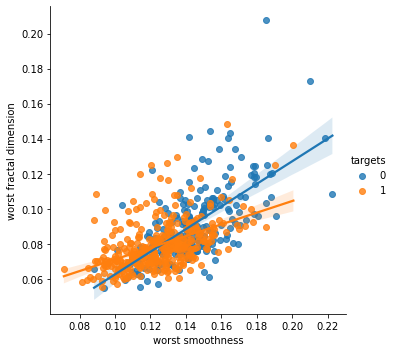

In [ ]:
import seaborn as sns
Visual = sns.lmplot(x="worst smoothness", y="worst fractal dimension",data = df,hue = 'targets')

In [ ]:
mu1,sd1 = df['worst smoothness'].mean(), df['worst smoothness'].std()
df['worst smoothness'] -= mu1
df['worst smoothness'] /= sd1
df['worst smoothness']
mu2,sd2 = df['worst fractal dimension'].mean(), df['worst fractal dimension'].std()
df['worst fractal dimension'] -= mu2
df['worst fractal dimension'] /= sd2
df['worst fractal dimension']

0      1.935312
1      0.280943
2      0.201214
3      4.930672
4     -0.396751
         ...   
564   -0.708467
565   -0.973122
566   -0.318129
567    2.217684
568   -0.750546
Name: worst fractal dimension, Length: 569, dtype: float64

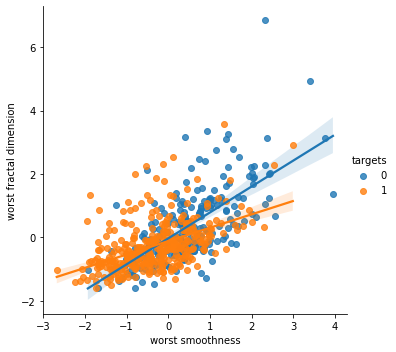

In [ ]:
Visual_new = sns.lmplot(x="worst smoothness", y="worst fractal dimension",data = df,hue = 'targets')
# The x-axis have a different scale. The advantage is standardization provides all features the same influence on the distance metric.

## Part 2: KNN Classifier without Standardization 
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. 
2.   What is the best `k`? What is the highest cross-validation accuracy? 
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). 




In [ ]:
from sklearn import neighbors
from sklearn.model_selection import cross_validate
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
scores = cross_validate(knn, X_train, y_train, cv=5,return_train_score=True)
print('Mean Train Accuracy:',scores['train_score'].mean()) # returns the mean cross-validation train score
print('Mean Validation Accuracy:', scores['test_score'].mean()) # returns the mean cross-validation validation score

Mean Train Accuracy: 1.0
Mean Validation Accuracy: 0.9171202531645569


In [ ]:
X=feature_data
y=target_data

In [ ]:
#apply KNN model and find the mean_cv_test_scores
import matplotlib.pyplot as plt
q = []

for i in range(1,101):
  knn = neighbors.KNeighborsClassifier(n_neighbors=i)
  knn.fit(X,y)
  scores = cross_validate(knn, X_train, y_train, cv=5,return_train_score=True)
  if scores['test_score'].mean() == 0.9346518987341772:
    print(i)
    q.append(scores['test_score'].mean())
  else:
    q.append(scores['test_score'].mean())

10
11


In [ ]:
#The best K is 10 & 11, and the highest cross-validation accuracy is 0.9346518987341772

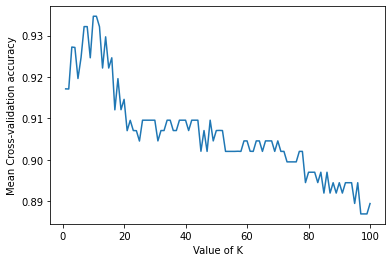

In [ ]:
plt.plot(range(1,101),q)
plt.xlabel('Value of K')
plt.ylabel('Mean Cross-validation accuracy')
plt.show()

In [ ]:
print(max(q)) #best mean cross validation accuracy

0.9346518987341772


In [ ]:
#apply knn and find the mean_cv_train_scores

c = []
for i in range(1,101):
  knn = neighbors.KNeighborsClassifier(n_neighbors=i)
  knn.fit(X,y)
  scores = cross_validate(knn, X_train, y_train, cv=5,return_train_score=True)
  c.append(scores['train_score'].mean())

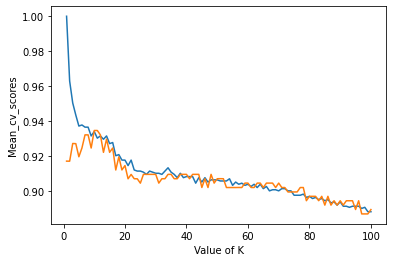

In [ ]:
plt.plot(range(1,101), c, label = "training_curve")
plt.plot(range(1,101), q, label =  "validation_curve")
plt.xlabel('Value of K')
plt.ylabel('Mean_cv_scores')
plt.show()
# Blue line is training_curve and orange line is validation_curve
# We can see when k is from 1 to 10,training_curve is way above validation_curve, so the model is overfitted.When k is from 60 to 100, the validation_curve and training_curve  both have low mean_cv_accuracy,
#so that the model is underfitted here.

In [ ]:
np.array(range(1,101)).shape[0]

100

## Part 3: Feature Selection 
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!. 

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use the following link to get familiar with extracting the feature impotance order of machine learning algorithms in Python: 

https://machinelearningmastery.com/calculate-feature-importance-with-python/

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to remove another feature. To do that we fit a new decision tree to the remaining features and identify the least important feature. 


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: 
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Each time, removes the least important feature based on step 2. 
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 1, fit a new tree on the reduced dataset and follow all the steps until you meet the stop condition. 
 
7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. 

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  

  
  







 

You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order. 
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [ ]:
# create a function for KNN model
def KNN_model (X,y,X_train,y_train):
  test_score_list = []
  for i in range(1,101):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X,y)
    scores = cross_validate(knn, X_train, y_train, cv=5,return_train_score=True)
    test_score_list.append(scores['test_score'].mean())
  return max(test_score_list), test_score_list.index(max(test_score_list))


In [ ]:
from sklearn import tree
def Feature_selector (X_train, y_train, tr=0.95):
  removed_features = [] # list for removed features
  corres_mean_cv_accuracy = [] # list for corresponding mean cv accuracy
  corres_k = [] # list for corresponding k value
  mean_cv_accuracy = 0.93
  while X_train.shape[1] > 1 and mean_cv_accuracy > tr * max(q):
    dt = tree.DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    importance = dt.feature_importances_
    index = np.where(importance == min(importance))# an array of min importance features index in importance
    removed_features.append(dataset['feature_names'][index[0][0]]) # add the name of the removed feature to a list
    dataset['feature_names'] = np.delete(dataset['feature_names'], np.where(dataset['feature_names']==dataset['feature_names'][index[0][0]]))
    X_train = np.delete(X_train, index[0][0], 1) # remove the feature column of the above index
    #call the defined function 
    KNN_model(X,y,X_train,y_train) 
    #append the returned values into the two lists
    mean_cv_accuracy,k_value = KNN_model(X,y,X_train,y_train)
    corres_mean_cv_accuracy.append(mean_cv_accuracy)
    corres_k.append(k_value) 
  return removed_features, corres_mean_cv_accuracy, corres_k
  
Q,W,E = Feature_selector(X_train, y_train, tr = 0.95)


In [ ]:
best_accuracy_list=list(W[::-1])
best_accuracy_list.append(max(q))

In [ ]:
best_k_value = list(E[::-1])
best_k_value.append(10)

In [ ]:
print(len(best_accuracy_list))

30


Text(0, 0.5, 'Mean Cross-validation accuracy')

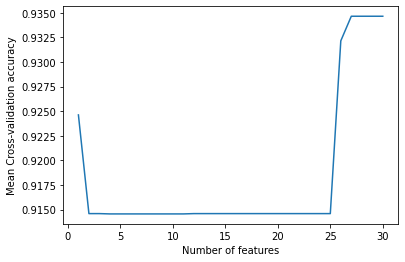

In [ ]:
plt.plot(range(1,31),best_accuracy_list)
plt.xlabel('Number of features')
plt.ylabel('Mean Cross-validation accuracy')

Text(0, 0.5, 'Value of k')

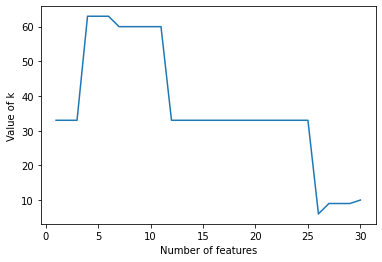

In [ ]:
plt.plot(range(1,31),best_k_value)
plt.xlabel('Number of features')
plt.ylabel('Value of k')

## Part 4: Standardization 

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) 

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 0.95\%.  
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?) 


In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train) #Use standardscaler to train x_train

# transform x_train and x_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

r,n,g = Feature_selector(X_train_scaled, y_train, tr = 0.95)


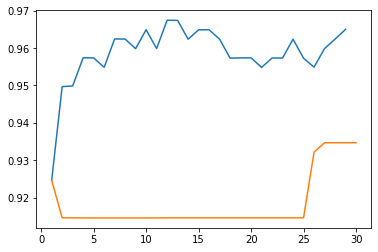

In [ ]:
#Plot
best_accuracy_list_standardized = list(n[::-1])
plt.plot(range(1,30),best_accuracy_list_standardized)
plt.plot(range(1,31),best_accuracy_list)
# Since K-Nearest classifier is distance based model,so the Euclidean distance can vary from an unknown range which means scaling is important.
# Standardization absolutely helped this model and its performance and the case after standardization lead to a higher cross validation accuracy no matter the number of the feature or the value of k that have been involved.

## Part 5: Test Data 

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results. 

In [ ]:
#test data
from sklearn.metrics import accuracy_score
knn_10 = neighbors.KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train_scaled,y_train)
accuracy = accuracy_score(y_test, knn_10.predict(X_test_scaled))
print ("Test set accuracy: ", accuracy * 100, "%")
# Here we got a higher accuracy score than the accuracy score with all features and no standardization in part2. Subsequently, the process of standardization and feature selection is substantial beneficial for this prediction.

Test set accuracy:  95.90643274853801 %


References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/